Installing Libraries

In [ ]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 9.9 MB/s eta 0:00:00


In [ ]:
pip install --upgrade keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.14.0 which is incompatible.


Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import itertools
import pathlib
import warnings
from PIL import Image
from random import randint
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from keras import layers
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D
from distutils.dir_util import copy_tree, remove_tree
import os
print(os.listdir("/content/drive/MyDrive/New mri/Dataset"))
print("TensorFlow Version:", tf.__version__)

['Non_Demented', 'parkinson', 'Moderate_Demented', 'Mild_Demented', 'Seizure MRI', 'Very_Mild_Demented']
TensorFlow Version: 2.13.0


Split folders

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/New mri/Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1))

Copying files: 6686 files [02:01, 54.86 files/s] 


Train,Validation and Test

In [ ]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 5345 files belonging to 6 classes.
Found 672 files belonging to 6 classes.
Found 667 files belonging to 6 classes.


Number of images in Mild_Demented: 896
Number of images in Moderate_Demented: 64
Number of images in Non_Demented: 3200
Number of images in Seizure MRI: 47
Number of images in Very_Mild_Demented: 2240
Number of images in Parkinson: 221


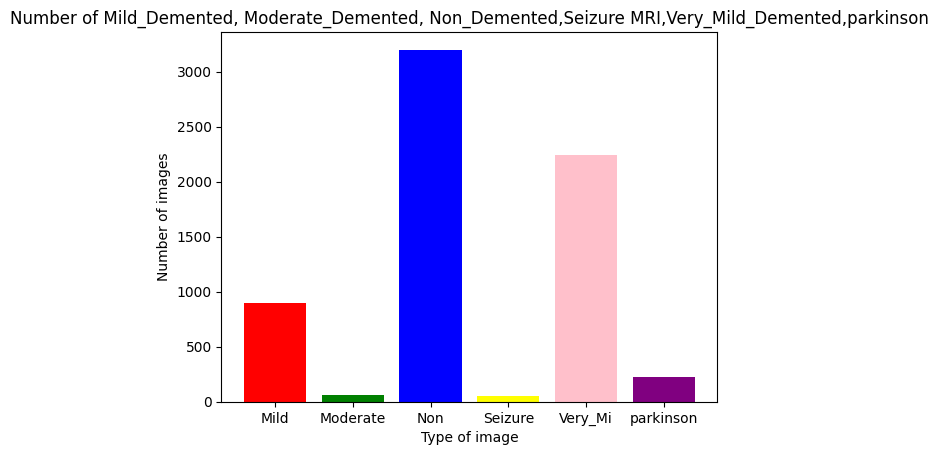

In [ ]:
def get_number_of_images(folder_path):
  number_of_images = 0
  for file in os.listdir(folder_path):
    if file.endswith(".png") or file.endswith(".jpg"):
      number_of_images += 1
  return number_of_images
if __name__ == "__main__":
  number_1= get_number_of_images("/content/drive/MyDrive/New mri/Dataset/Mild_Demented")
  print("Number of images in Mild_Demented:", number_1)
  number_2 = get_number_of_images("/content/drive/MyDrive/New mri/Dataset/Moderate_Demented")
  print("Number of images in Moderate_Demented:", number_2)
  number_3 = get_number_of_images("/content/drive/MyDrive/New mri/Dataset/Non_Demented")
  print("Number of images in Non_Demented:", number_3)
  number_4= get_number_of_images("/content/drive/MyDrive/New mri/Dataset/Seizure MRI")
  print("Number of images in Seizure MRI:", number_4)
  number_5 = get_number_of_images("/content/drive/MyDrive/New mri/Dataset/Very_Mild_Demented")
  print("Number of images in Very_Mild_Demented:", number_5)
  number_6 = get_number_of_images("/content/drive/MyDrive/New mri/Dataset/parkinson")
  print("Number of images in Parkinson:", number_6)
  number_of_images_list = [number_1, number_2, number_3,number_4,number_5,number_6]
  colors = ['red', 'green', 'blue','yellow','pink','purple']
  plt.bar(['Mild', 'Moderate', 'Non','Seizure','Very_Mi','parkinson'], number_of_images_list, color=colors)
  plt.title('Number of Mild_Demented, Moderate_Demented, Non_Demented,Seizure MRI,Very_Mild_Demented,parkinson')
  plt.xlabel('Type of image')
  plt.ylabel('Number of images')
  plt.show()


In [ ]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Seizure MRI', 'Very_Mild_Demented', 'parkinson']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
img_augmentation = keras.Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

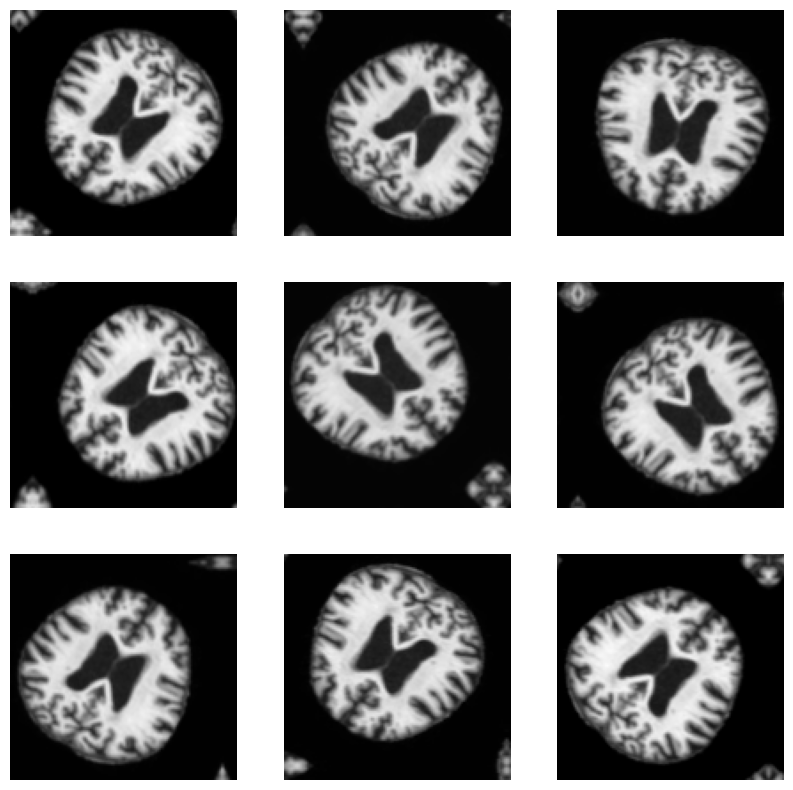

In [ ]:
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(1):
    for i in range(9):
        augmented_images = img_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Number of images in Mild_Demented: 896
Number of images in Moderate_Demented: 64
Number of images in Non_Demented: 3200
Number of images in Seizure MRI: 47
Number of images in Very_Mild_Demented: 2240
Number of images in Parkinson: 221


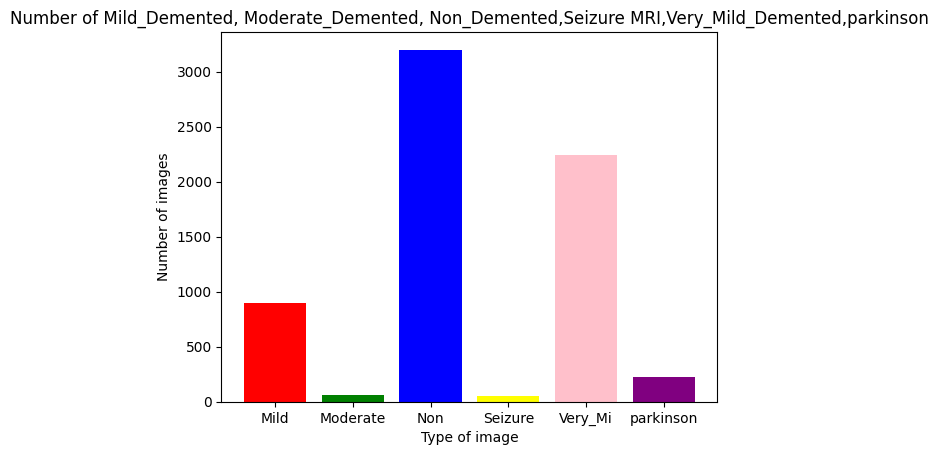

In [ ]:
def get_number_of_images(folder_path):
  number_of_images = 0
  for file in os.listdir(folder_path):
    if file.endswith(".png") or file.endswith(".jpg"):
      number_of_images += 1
  return number_of_images
if __name__ == "__main__":
  number_1= get_number_of_images("/content/drive/MyDrive/New mri/Dataset/Mild_Demented")
  print("Number of images in Mild_Demented:", number_1)
  number_2 = get_number_of_images("/content/drive/MyDrive/New mri/Dataset/Moderate_Demented")
  print("Number of images in Moderate_Demented:", number_2)
  number_3 = get_number_of_images("/content/drive/MyDrive/New mri/Dataset/Non_Demented")
  print("Number of images in Non_Demented:", number_3)
  number_4= get_number_of_images("/content/drive/MyDrive/New mri/Dataset/Seizure MRI")
  print("Number of images in Seizure MRI:", number_4)
  number_5 = get_number_of_images("/content/drive/MyDrive/New mri/Dataset/Very_Mild_Demented")
  print("Number of images in Very_Mild_Demented:", number_5)
  number_6 = get_number_of_images("/content/drive/MyDrive/New mri/Dataset/parkinson")
  print("Number of images in Parkinson:", number_6)
  number_of_images_list = [number_1, number_2, number_3,number_4,number_5,number_6]
  colors = ['red', 'green', 'blue','yellow','pink','purple']
  plt.bar(['Mild', 'Moderate', 'Non','Seizure','Very_Mi','parkinson'], number_of_images_list, color=colors)
  plt.title('Number of Mild_Demented, Moderate_Demented, Non_Demented,Seizure MRI,Very_Mild_Demented,parkinson')
  plt.xlabel('Type of image')
  plt.ylabel('Number of images')
  plt.show()


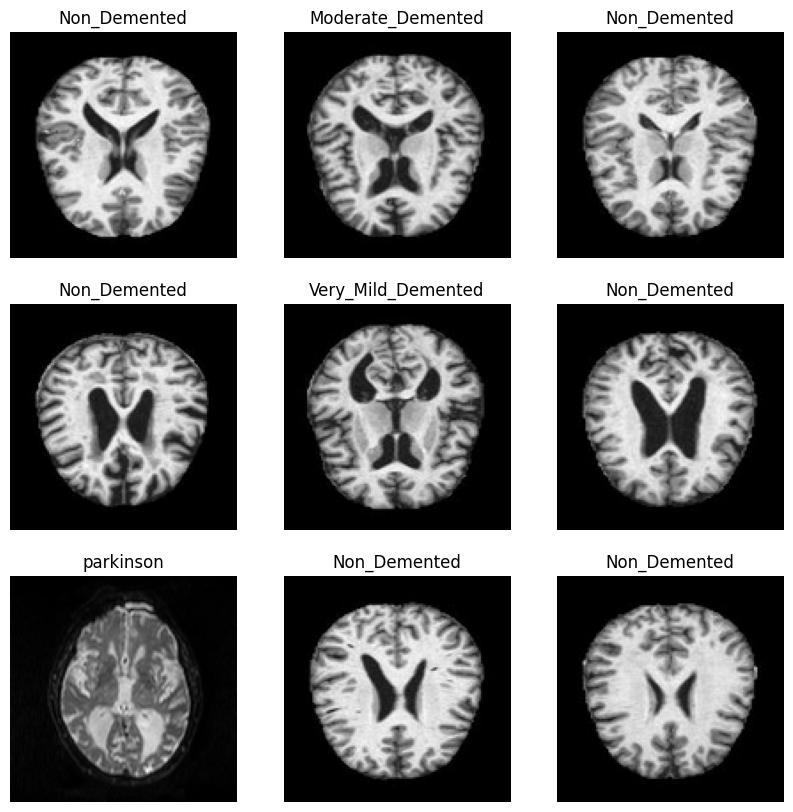

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# size = [896,64,3200,2240]
# ax.bar(class_names,size)
# plt.show

Simple CNN

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(6,"softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=30, batch_size=64, verbose=1)

Epoch 1/30
84/84 [==============================] - 18s 36ms/step - loss: 1.1424 - accuracy: 0.5138 - val_loss: 0.8661 - val_accuracy: 0.6387
Epoch 2/30
84/84 [==============================] - 3s 30ms/step - loss: 0.8618 - accuracy: 0.5961 - val_loss: 0.7847 - val_accuracy: 0.6492
Epoch 3/30
84/84 [==============================] - 4s 50ms/step - loss: 0.7824 - accuracy: 0.6451 - val_loss: 0.7138 - val_accuracy: 0.6897
Epoch 4/30
84/84 [==============================] - 3s 29ms/step - loss: 0.7284 - accuracy: 0.6775 - val_loss: 0.6206 - val_accuracy: 0.7301
Epoch 5/30
84/84 [==============================] - 3s 28ms/step - loss: 0.6060 - accuracy: 0.7398 - val_loss: 0.5095 - val_accuracy: 0.7826
Epoch 6/30
84/84 [==============================] - 3s 29ms/step - loss: 0.5758 - accuracy: 0.7553 - val_loss: 0.4432 - val_accuracy: 0.8081
Epoch 7/30
84/84 [==============================] - 4s 44ms/step - loss: 0.4376 - accuracy: 0.8180 - val_loss: 0.3583 - val_accuracy: 0.8861
Epoch 8/30
8

In [ ]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

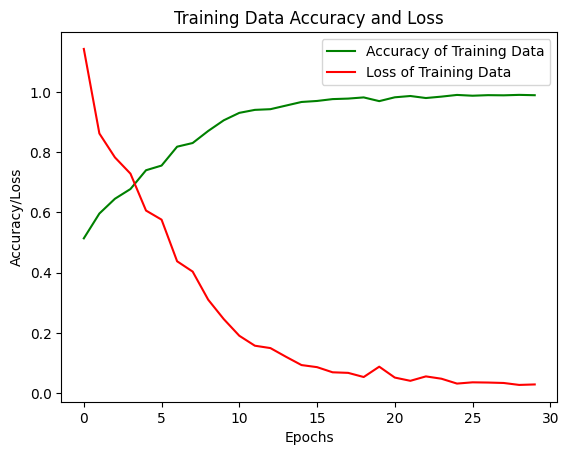

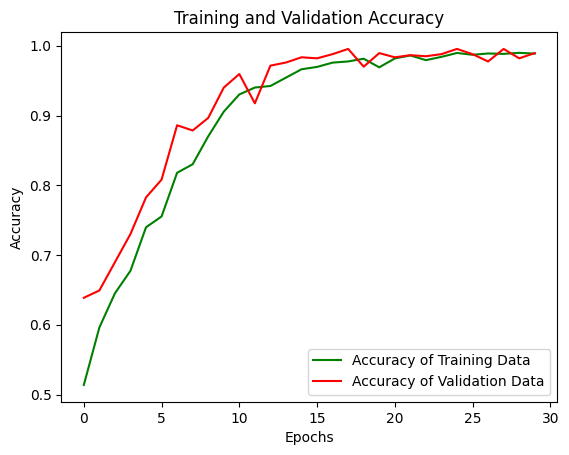

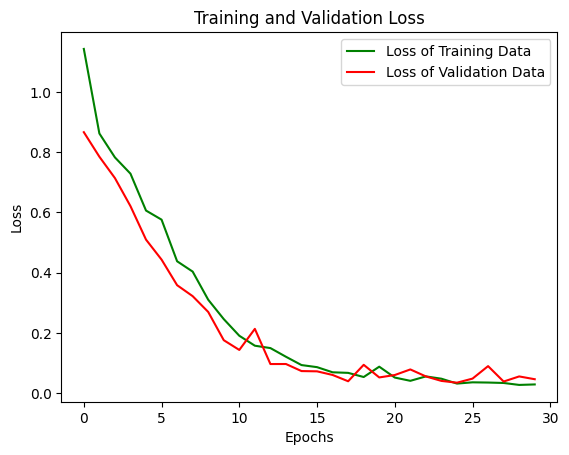

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(get_ac))

# Plot accuracy and loss of training data
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, get_los, 'r', label='Loss of Training Data')
plt.title('Training Data Accuracy and Loss')
plt.legend(loc=0)

# Set x-axis and y-axis labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')

plt.show()

# Create a new figure for the next plot
plt.figure()

# Plot training accuracy and validation accuracy
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)

# Set x-axis and y-axis labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

# Create a new figure for the next plot
plt.figure()

# Plot training loss and validation loss
plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)

# Set x-axis and y-axis labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()


In [ ]:
loss, accuracy = model.evaluate(test_ds)
print(loss,accuracy)

11/11 [==============================] - 0s 30ms/step - loss: 0.0379 - accuracy: 0.9866
0.037945084273815155 0.9866071343421936


In [ ]:
!pip install matplotlib

1/1 [==============================] - 0s 48ms/step


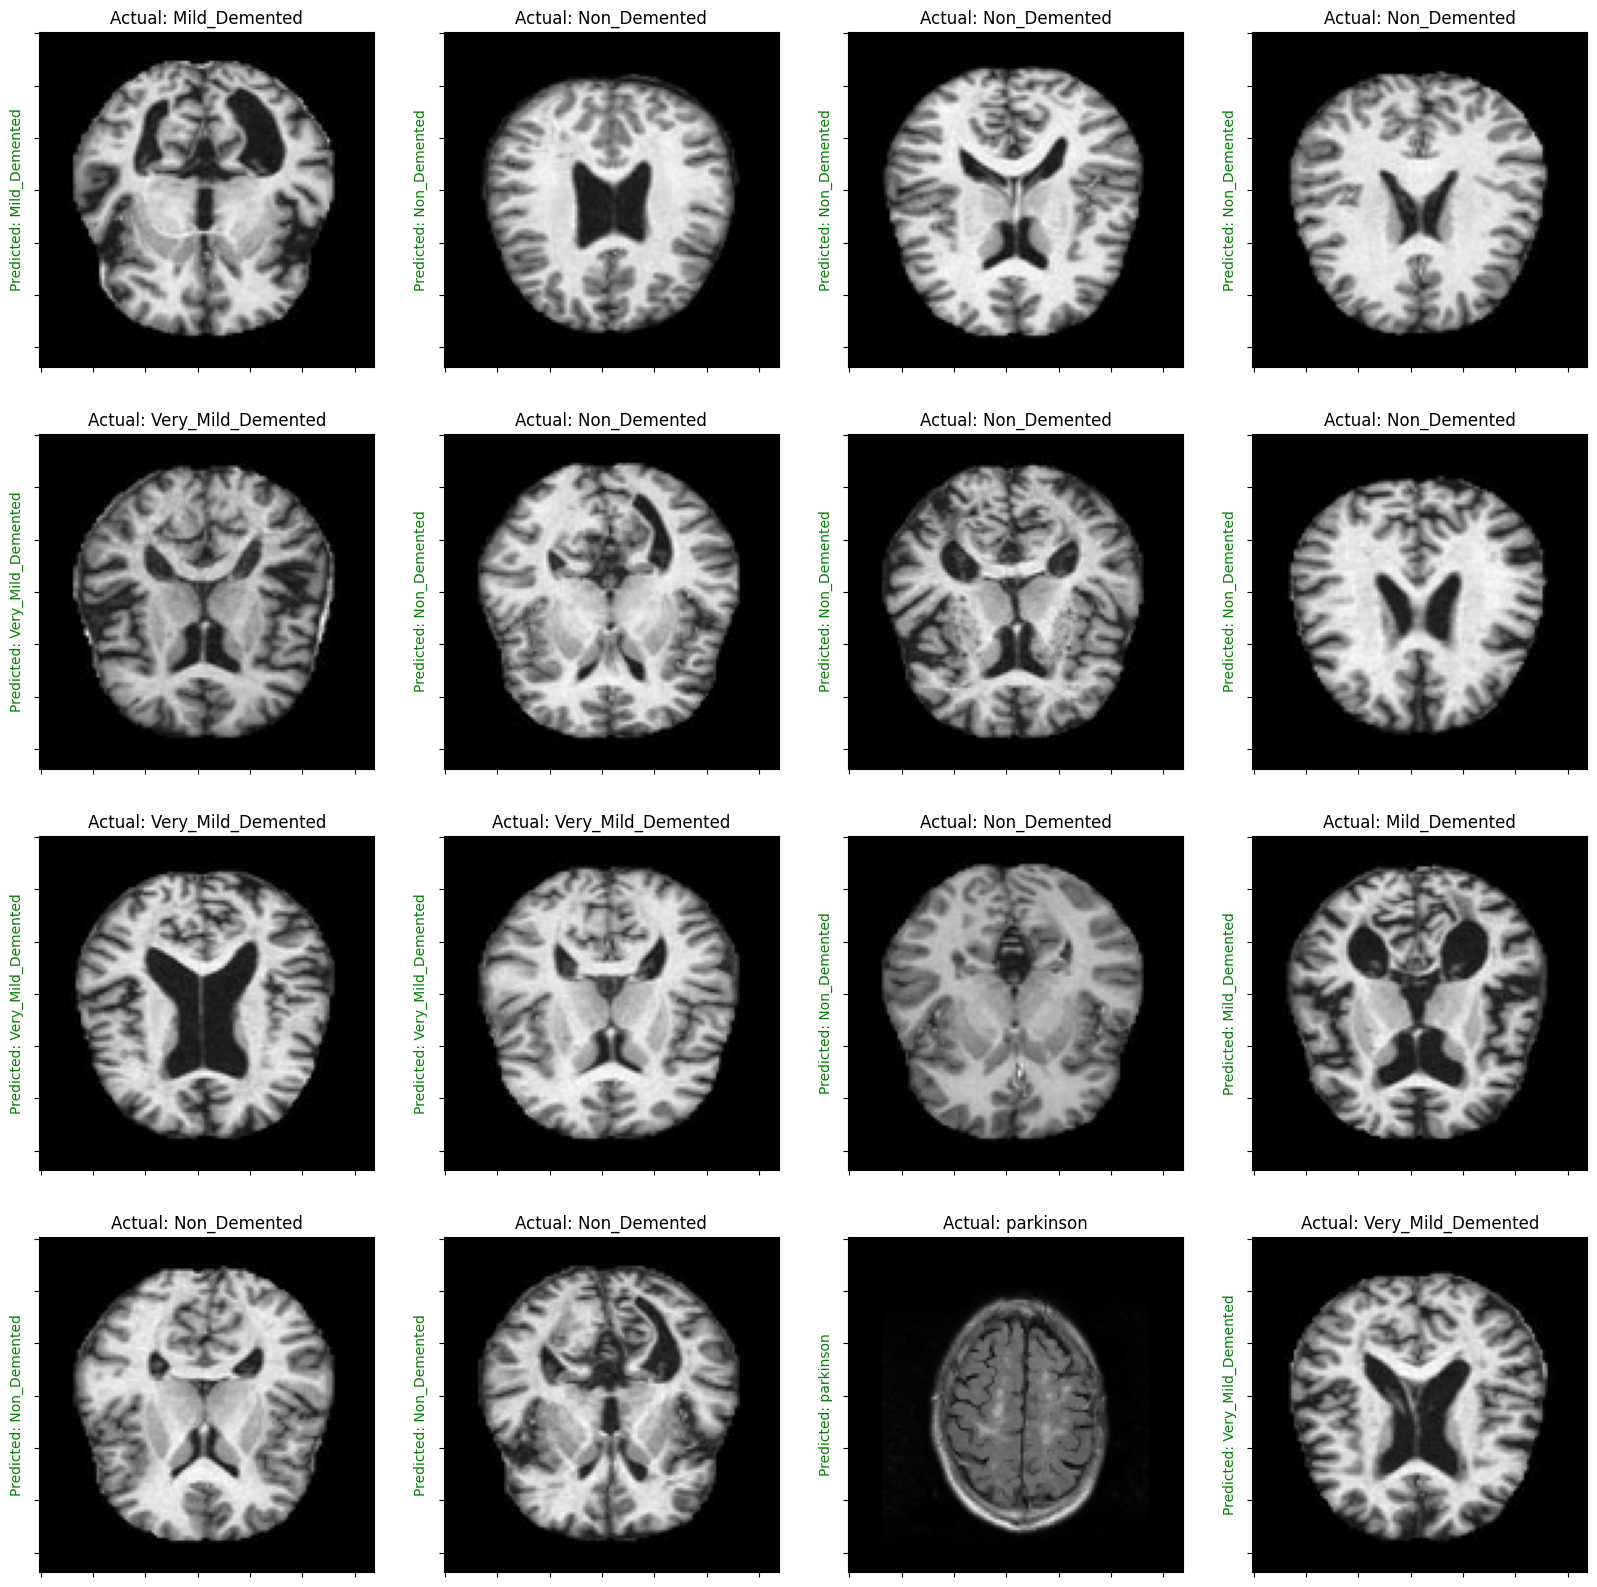

In [ ]:
plt.subplots(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

In [ ]:
for img, label in test_ds.take(1):
    print(label, len(label))
    break

tf.Tensor(
[2 2 2 0 4 2 2 4 4 4 2 4 2 0 4 0 2 4 2 2 2 2 2 2 2 2 3 2 4 4 4 4 2 0 4 2 2
 4 4 5 2 5 2 4 4 0 4 2 4 2 0 4 4 2 4 2 4 2 2 0 2 4 4 2], shape=(64,), dtype=int32) 64


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
actual_label = []
pred_label = []
for img, label in test_ds.take(1):
    pred = model.predict(img)
    pred = np.argmax(pred, axis=1)
    print(classification_report(label,pred))

2/2 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           2       0.96      1.00      0.98        27
           4       1.00      0.96      0.98        25
           5       1.00      1.00      1.00         4

    accuracy                           0.98        64
   macro avg       0.99      0.99      0.99        64
weighted avg       0.98      0.98      0.98        64



In [ ]:
from sklearn.metrics import classification_report

# Your existing code to get the classification report
for img, label in test_ds.take(1):
    pred = model.predict(img)
    pred = np.argmax(pred, axis=1)
    report = classification_report(label, pred, output_dict=True)

# Specify the class index for which you want to store the F1-score
class_index = 0  # Change this to the desired class index

# Extract and store the F1-score for the specified class
f1_score = report[str(class_index)]['f1-score']

# Now, you have the F1-score for the specified class in the 'f1_score' variable
print(f'F1-score for class {class_index}: {f1_score}')


2/2 [==============================] - 0s 7ms/step
F1-score for class 0: 0.9411764705882353


DNN


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
# Replace convolutional layers with feedforward neural network layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(6, "softmax"))


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "adam",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               6291584   
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 6)                 390       
                                                                 
Total params: 6300230 (24.03 MB)
Trainable params: 6300230 (24.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=30, batch_size=64, verbose=1)

Epoch 1/30
84/84 [==============================] - 5s 33ms/step - loss: 2.7726 - accuracy: 0.4829 - val_loss: 0.9312 - val_accuracy: 0.5487
Epoch 2/30
84/84 [==============================] - 2s 23ms/step - loss: 1.2078 - accuracy: 0.5654 - val_loss: 0.7307 - val_accuracy: 0.6672
Epoch 3/30
84/84 [==============================] - 2s 25ms/step - loss: 0.8484 - accuracy: 0.6417 - val_loss: 1.1432 - val_accuracy: 0.5037
Epoch 4/30
84/84 [==============================] - 4s 41ms/step - loss: 0.7301 - accuracy: 0.6926 - val_loss: 0.6308 - val_accuracy: 0.7301
Epoch 5/30
84/84 [==============================] - 2s 22ms/step - loss: 0.8783 - accuracy: 0.6681 - val_loss: 0.6096 - val_accuracy: 0.7331
Epoch 6/30
84/84 [==============================] - 2s 22ms/step - loss: 0.5485 - accuracy: 0.7557 - val_loss: 0.5329 - val_accuracy: 0.7856
Epoch 7/30
84/84 [==============================] - 2s 23ms/step - loss: 0.5897 - accuracy: 0.7476 - val_loss: 0.6046 - val_accuracy: 0.7316
Epoch 8/30
84

In [ ]:
get_ac3 = hist.history['accuracy']
get_los3 = hist.history['loss']
val_acc3 = hist.history['val_accuracy']
val_loss3 = hist.history['val_loss']

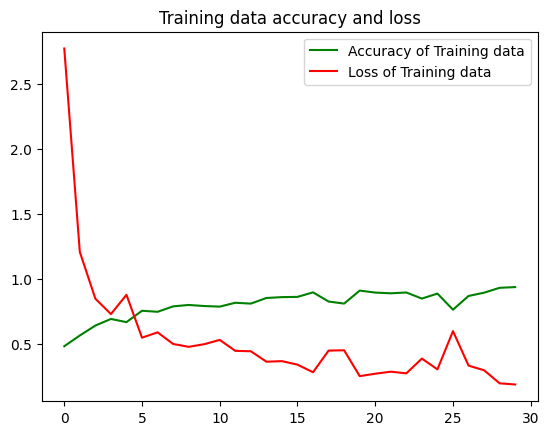

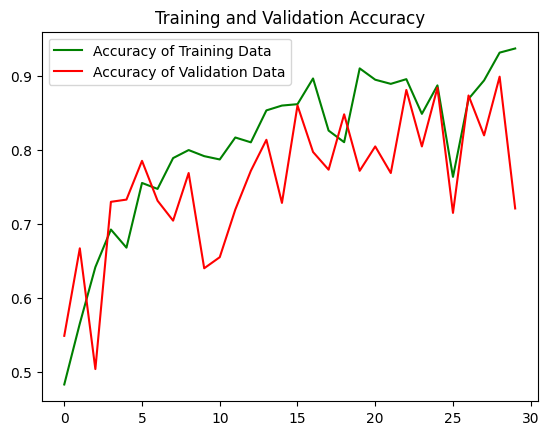

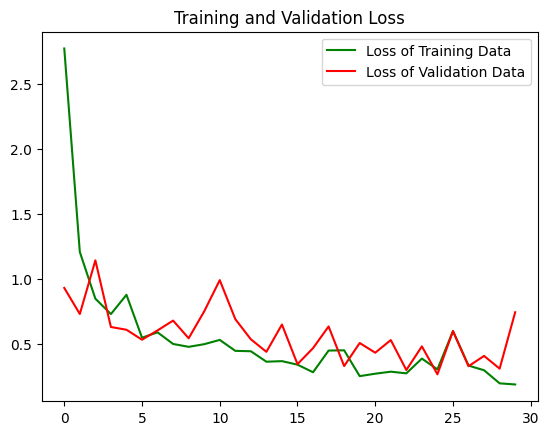

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac3))
plt.plot(epochs, get_ac3, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los3, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac3, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc3, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los3, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss3, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
loss5, accuracy2 = model.evaluate(test_ds)
print(loss5,accuracy2)

11/11 [==============================] - 0s 10ms/step - loss: 0.8742 - accuracy: 0.6905
0.8741770386695862 0.6904761791229248


1/1 [==============================] - 0s 17ms/step


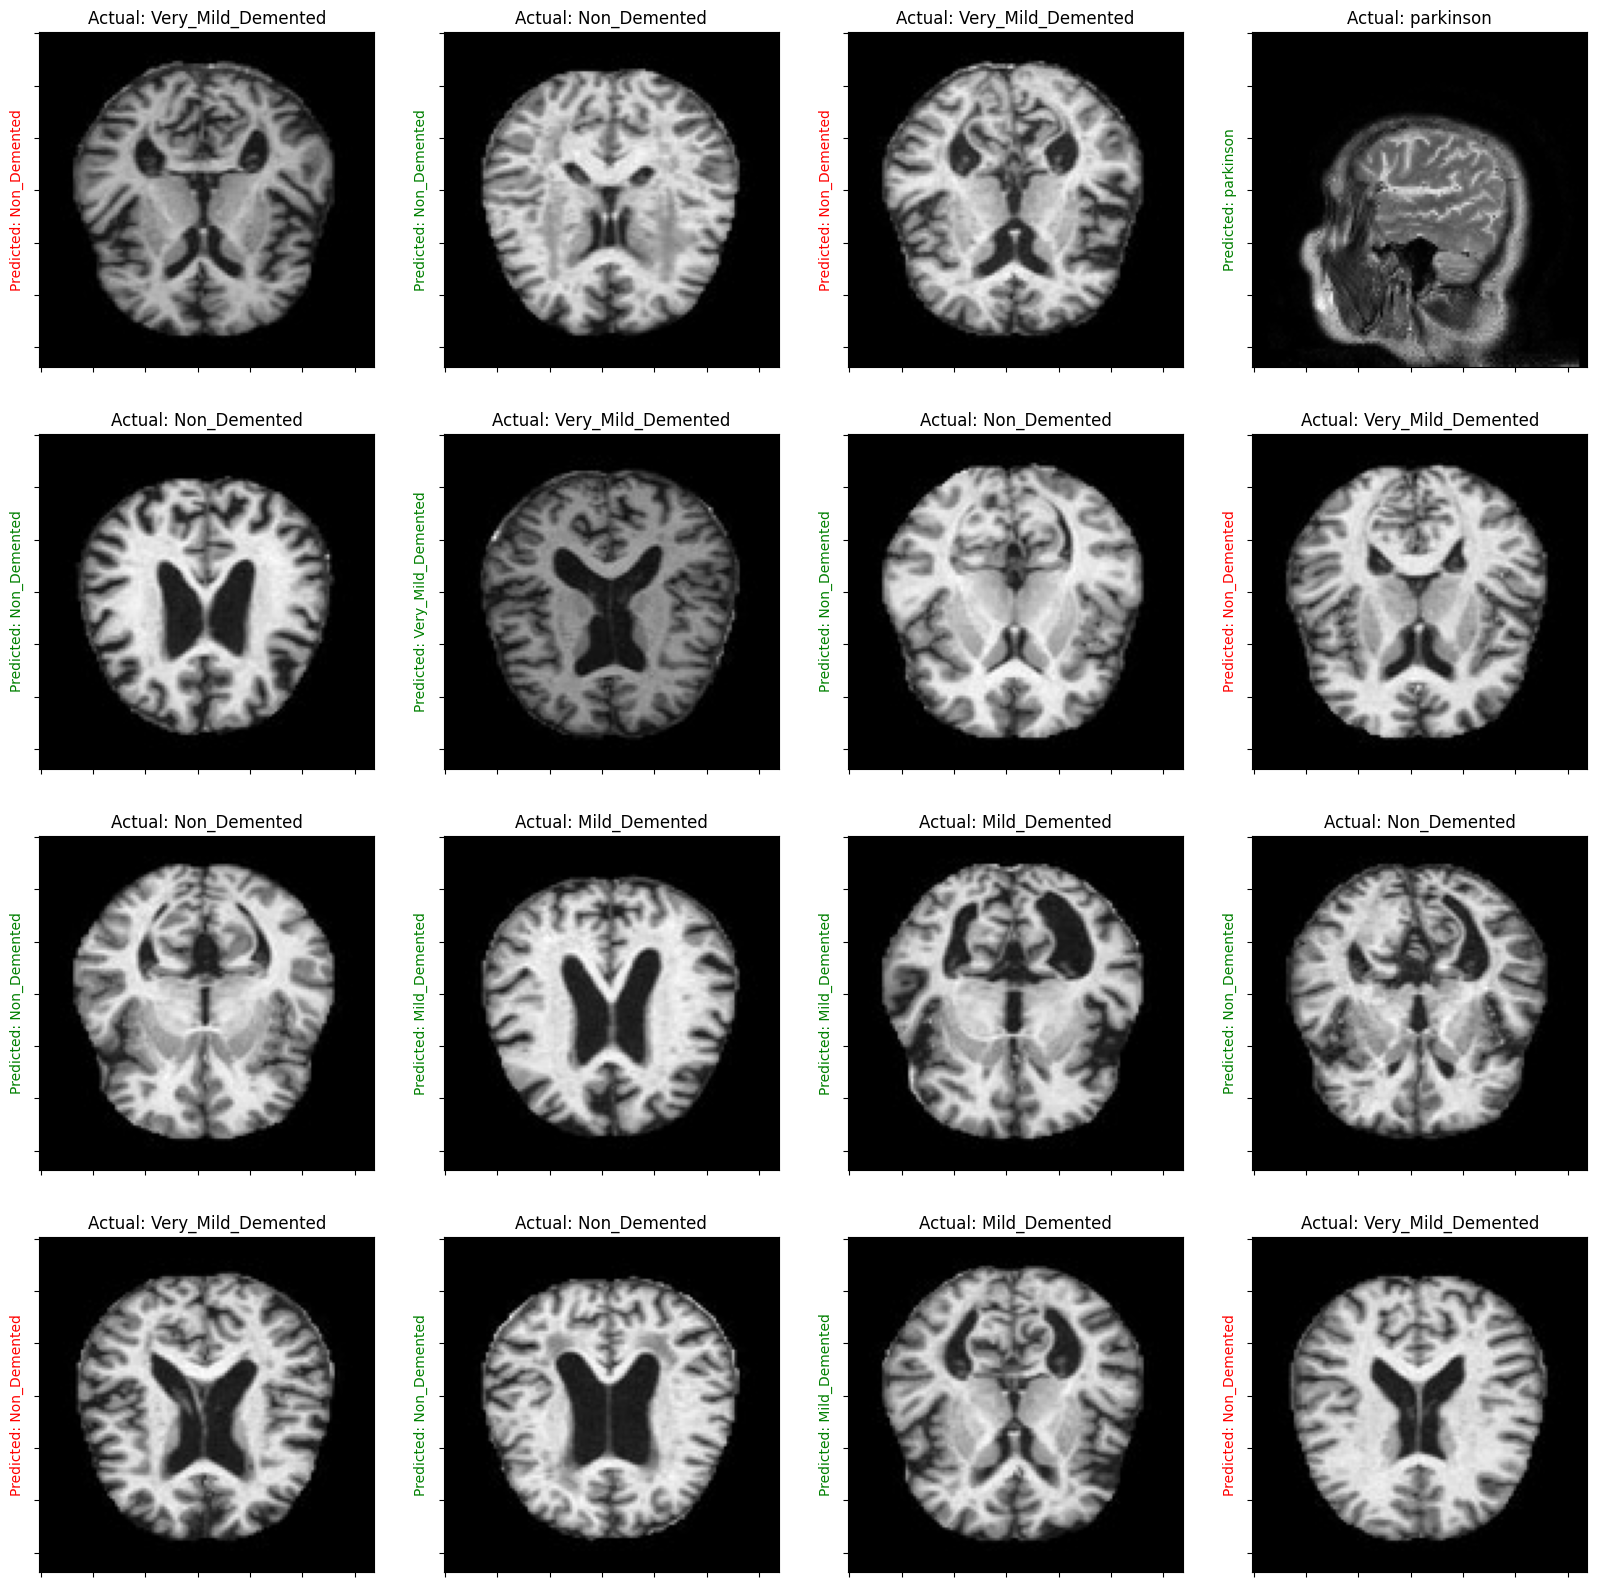

In [ ]:
plt.subplots(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

In [ ]:
for img, label in test_ds.take(1):
    print(label, len(label))
    break

tf.Tensor(
[2 2 2 2 5 2 0 4 2 4 1 1 0 2 0 4 4 4 4 4 5 4 2 0 2 2 4 5 4 2 2 4 2 4 2 2 2
 2 2 2 2 2 2 2 2 2 4 2 2 5 0 0 2 2 2 4 4 2 2 2 0 4 2 2], shape=(64,), dtype=int32) 64


In [ ]:
actual_label = []
pred_label = []
for img, label in test_ds.take(1):
    pred = model.predict(img)
    pred = np.argmax(pred, axis=1)
    print(classification_report(label,pred))

2/2 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       1.00      1.00      1.00         1
           2       0.65      1.00      0.79        33
           4       1.00      0.25      0.40        20
           5       1.00      1.00      1.00         2

    accuracy                           0.72        64
   macro avg       0.93      0.78      0.79        64
weighted avg       0.82      0.72      0.67        64



RESNET-50

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(keras.applications.ResNet50(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64, "relu"))
model.add(keras.layers.Dense(6, "softmax"))

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "adam",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 6)                 390       
                                                      

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=30, batch_size=64, verbose=1)

Epoch 1/30
84/84 [==============================] - 64s 257ms/step - loss: 0.8161 - accuracy: 0.6378 - val_loss: 7.5627 - val_accuracy: 0.0330
Epoch 2/30
84/84 [==============================] - 19s 220ms/step - loss: 0.4077 - accuracy: 0.8457 - val_loss: 10.8529 - val_accuracy: 0.0330
Epoch 3/30
84/84 [==============================] - 18s 215ms/step - loss: 0.2348 - accuracy: 0.9128 - val_loss: 16.9445 - val_accuracy: 0.0330
Epoch 4/30
84/84 [==============================] - 19s 223ms/step - loss: 0.1213 - accuracy: 0.9594 - val_loss: 31.7920 - val_accuracy: 0.0330
Epoch 5/30
84/84 [==============================] - 18s 218ms/step - loss: 0.0961 - accuracy: 0.9686 - val_loss: 73.4656 - val_accuracy: 0.0330
Epoch 6/30
84/84 [==============================] - 19s 222ms/step - loss: 0.0913 - accuracy: 0.9667 - val_loss: 56.3751 - val_accuracy: 0.0330
Epoch 7/30
84/84 [==============================] - 19s 221ms/step - loss: 0.0601 - accuracy: 0.9774 - val_loss: 62.9774 - val_accuracy: 

In [ ]:
get_ac3 = hist.history['accuracy']
get_los3 = hist.history['loss']
val_acc3 = hist.history['val_accuracy']
val_loss3 = hist.history['val_loss']

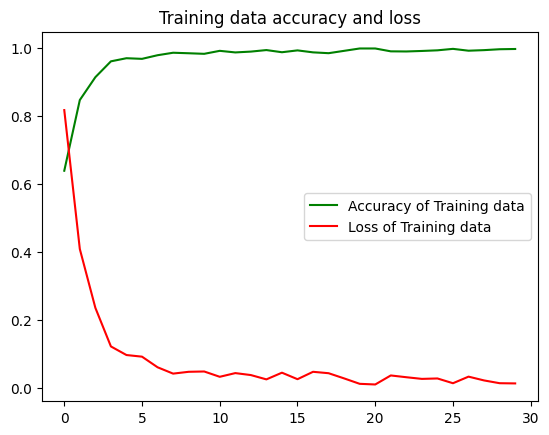

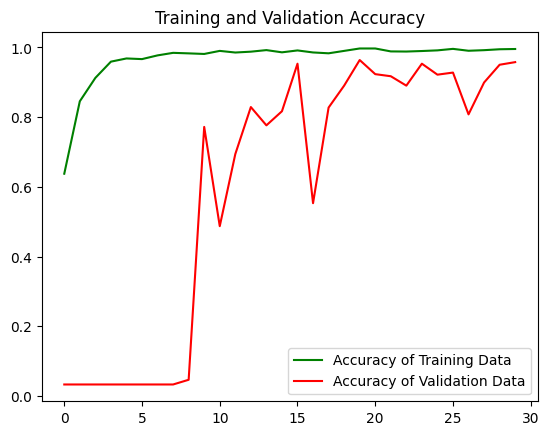

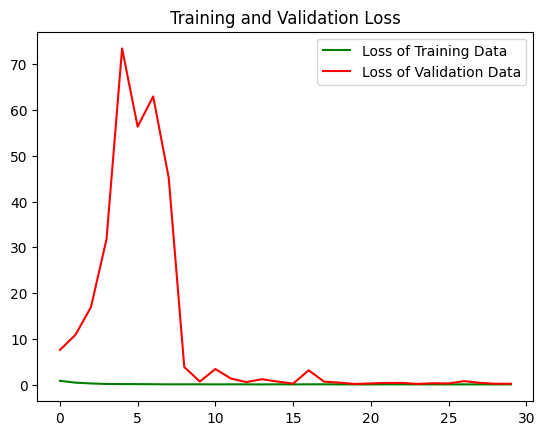

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac3))
plt.plot(epochs, get_ac3, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los3, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac3, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc3, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los3, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss3, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
loss3, accuracy3 = model.evaluate(test_ds)
print(loss3,accuracy3)

11/11 [==============================] - 2s 127ms/step - loss: 0.1749 - accuracy: 0.9449
0.17487744987010956 0.944940447807312


1/1 [==============================] - 0s 40ms/step


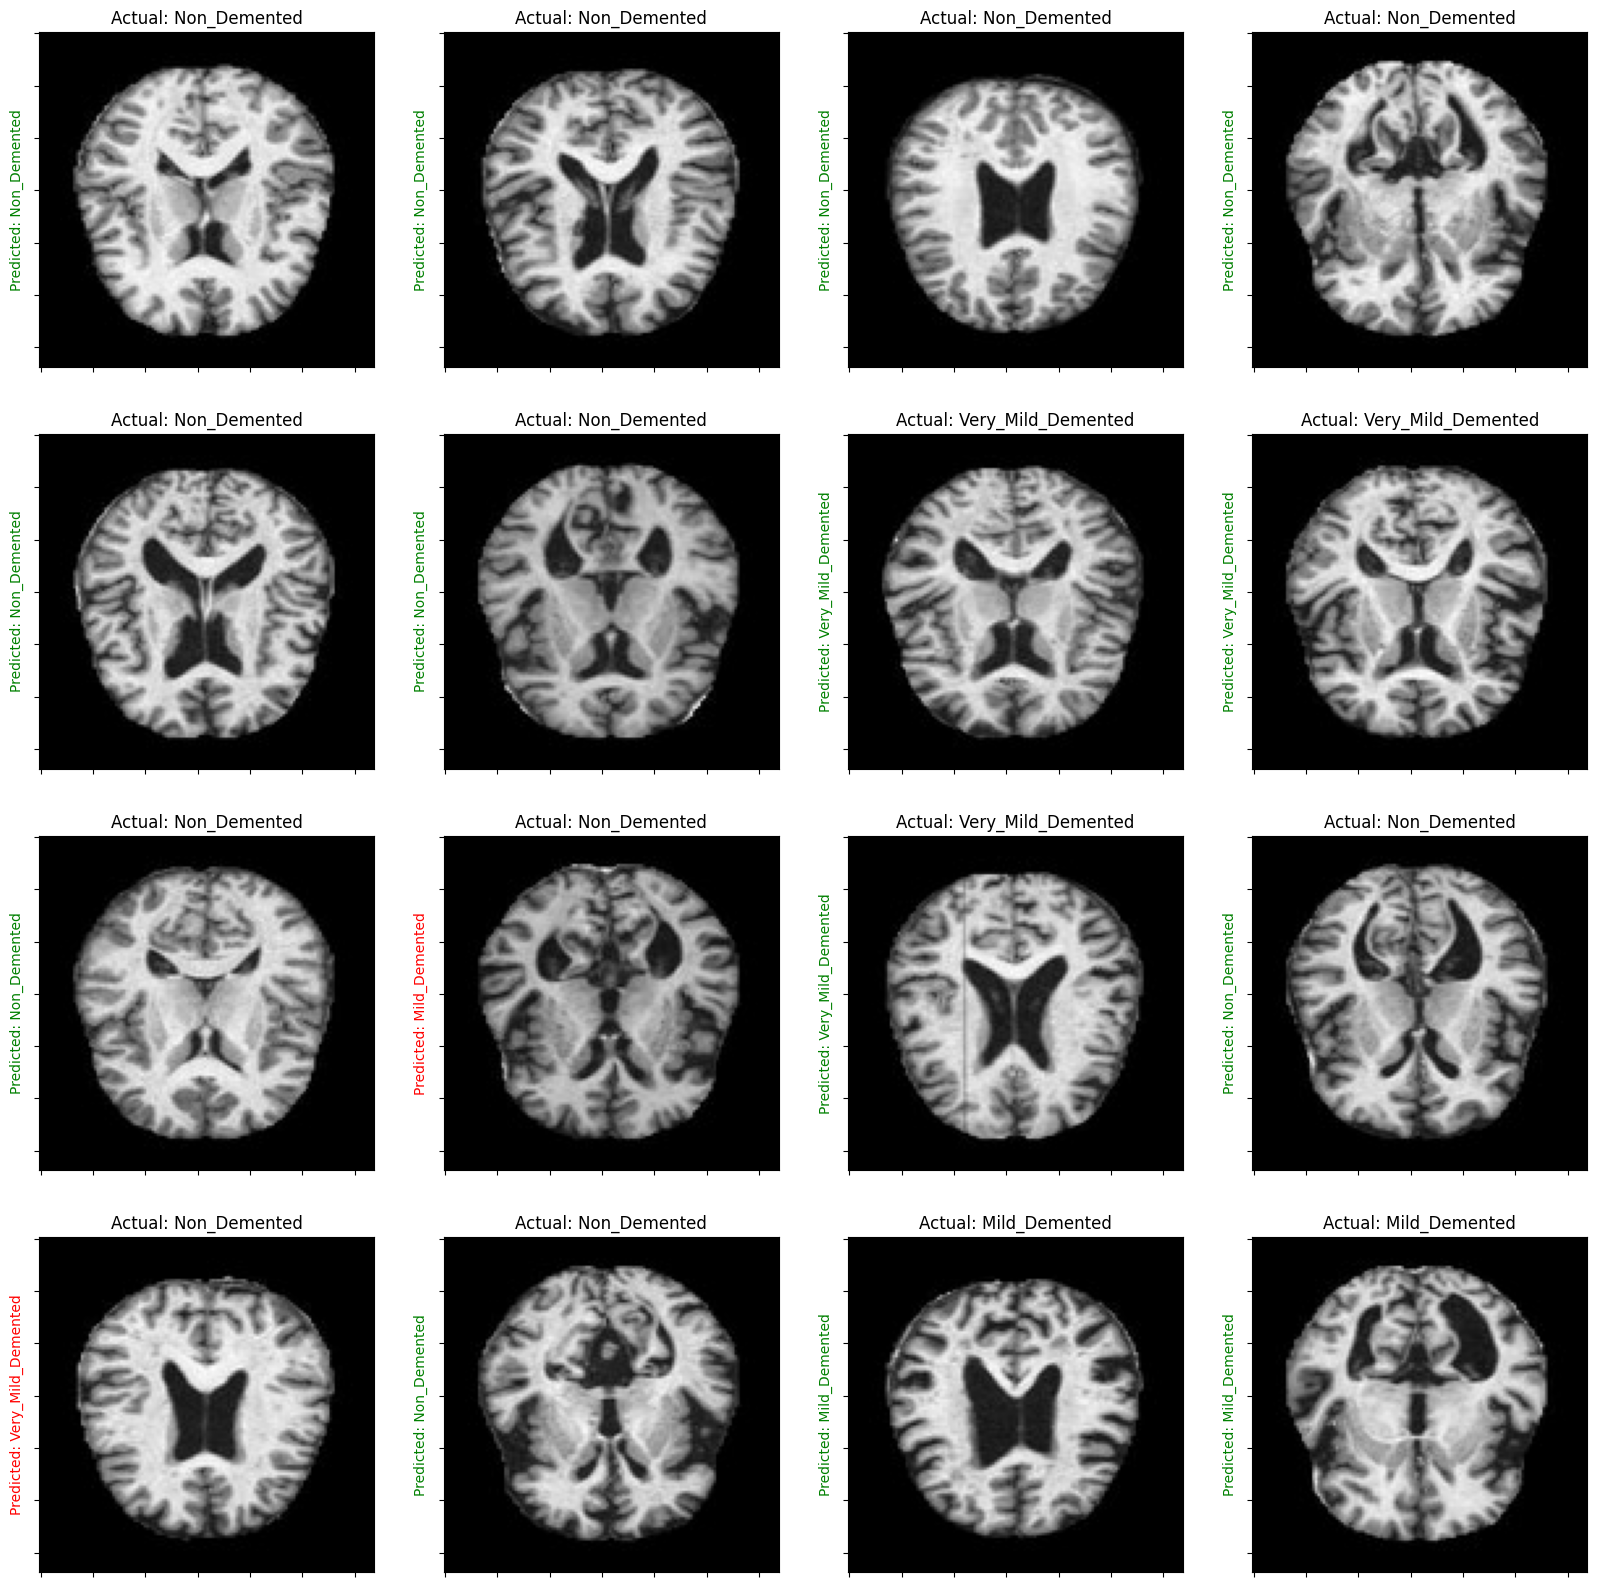

In [ ]:
plt.subplots(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

In [ ]:
for img, label in test_ds.take(1):
    print(label, len(label))
    break

tf.Tensor(
[2 4 2 4 2 2 2 2 2 0 2 4 2 0 2 2 2 4 4 4 4 2 2 0 4 2 4 0 2 4 0 0 2 4 0 2 2
 4 2 0 5 5 2 2 5 4 2 4 2 2 4 4 2 4 4 3 4 4 4 4 2 0 2 4], shape=(64,), dtype=int32) 64


In [ ]:
actual_label = []
pred_label = []
for img, label in test_ds.take(1):
    pred = model.predict(img)
    pred = np.argmax(pred, axis=1)
    print(classification_report(label,pred))

2/2 [==============================] - 0s 46ms/step
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.50      0.67         2
           2       1.00      0.77      0.87        30
           4       0.81      1.00      0.90        22

    accuracy                           0.88        64
   macro avg       0.90      0.82      0.83        64
weighted avg       0.90      0.88      0.87        64



DENSENET-169

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(keras.applications.DenseNet169(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64, "relu"))
model.add(keras.layers.Dense(6, "softmax"))

51877672/51877672 [==============================] - 2s 0us/step


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "adam",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 densenet169 (Functional)    (None, 4, 4, 1664)        12642880  
                                                                 
 global_average_pooling2d_1  (None, 1664)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_9 (Dense)             (None, 128)               213120    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 6)                 390       
                                                      

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=30, batch_size=64, verbose=1)

Epoch 1/30
84/84 [==============================] - 142s 405ms/step - loss: 0.8075 - accuracy: 0.6367 - val_loss: 5.7758 - val_accuracy: 0.4018
Epoch 2/30
84/84 [==============================] - 25s 290ms/step - loss: 0.4850 - accuracy: 0.8011 - val_loss: 4.6836 - val_accuracy: 0.5562
Epoch 3/30
84/84 [==============================] - 24s 289ms/step - loss: 0.2528 - accuracy: 0.9029 - val_loss: 8.5959 - val_accuracy: 0.4468
Epoch 4/30
84/84 [==============================] - 25s 295ms/step - loss: 0.1731 - accuracy: 0.9368 - val_loss: 11.4607 - val_accuracy: 0.3643
Epoch 5/30
84/84 [==============================] - 25s 290ms/step - loss: 0.1471 - accuracy: 0.9450 - val_loss: 1.8786 - val_accuracy: 0.7346
Epoch 6/30
84/84 [==============================] - 25s 291ms/step - loss: 0.0637 - accuracy: 0.9777 - val_loss: 0.7754 - val_accuracy: 0.8231
Epoch 7/30
84/84 [==============================] - 25s 291ms/step - loss: 0.0769 - accuracy: 0.9761 - val_loss: 0.3328 - val_accuracy: 0.91

In [ ]:
get_ac5 = hist.history['accuracy']
get_los5 = hist.history['loss']
val_acc5 = hist.history['val_accuracy']
val_loss5 = hist.history['val_loss']

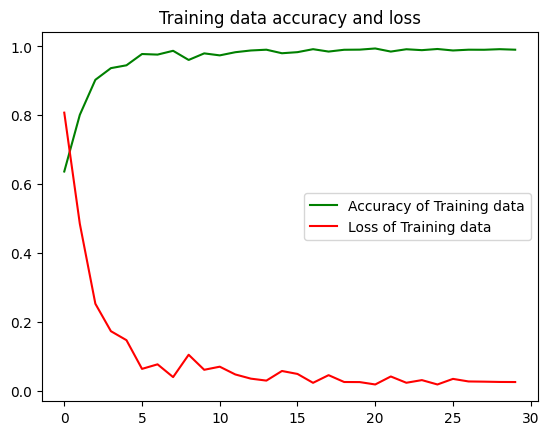

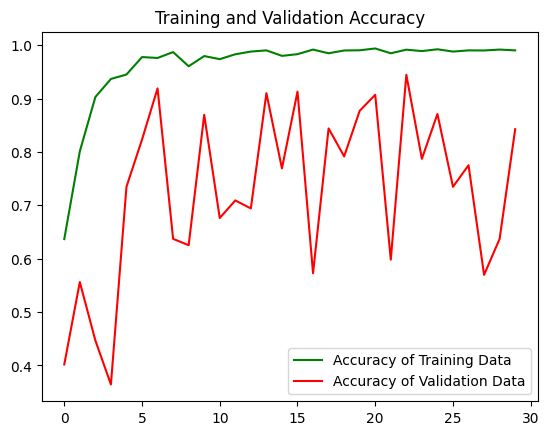

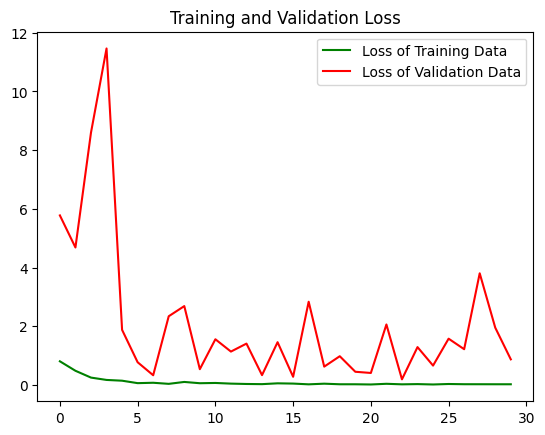

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac5))
plt.plot(epochs, get_ac5, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los5, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac5, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc5, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los5, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss5, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()


In [ ]:
loss5, accuracy4 = model.evaluate(test_ds)
print(loss5,accuracy4)

11/11 [==============================] - 3s 290ms/step - loss: 0.9561 - accuracy: 0.8586
0.9560908079147339 0.8586309552192688


1/1 [==============================] - 0s 33ms/step


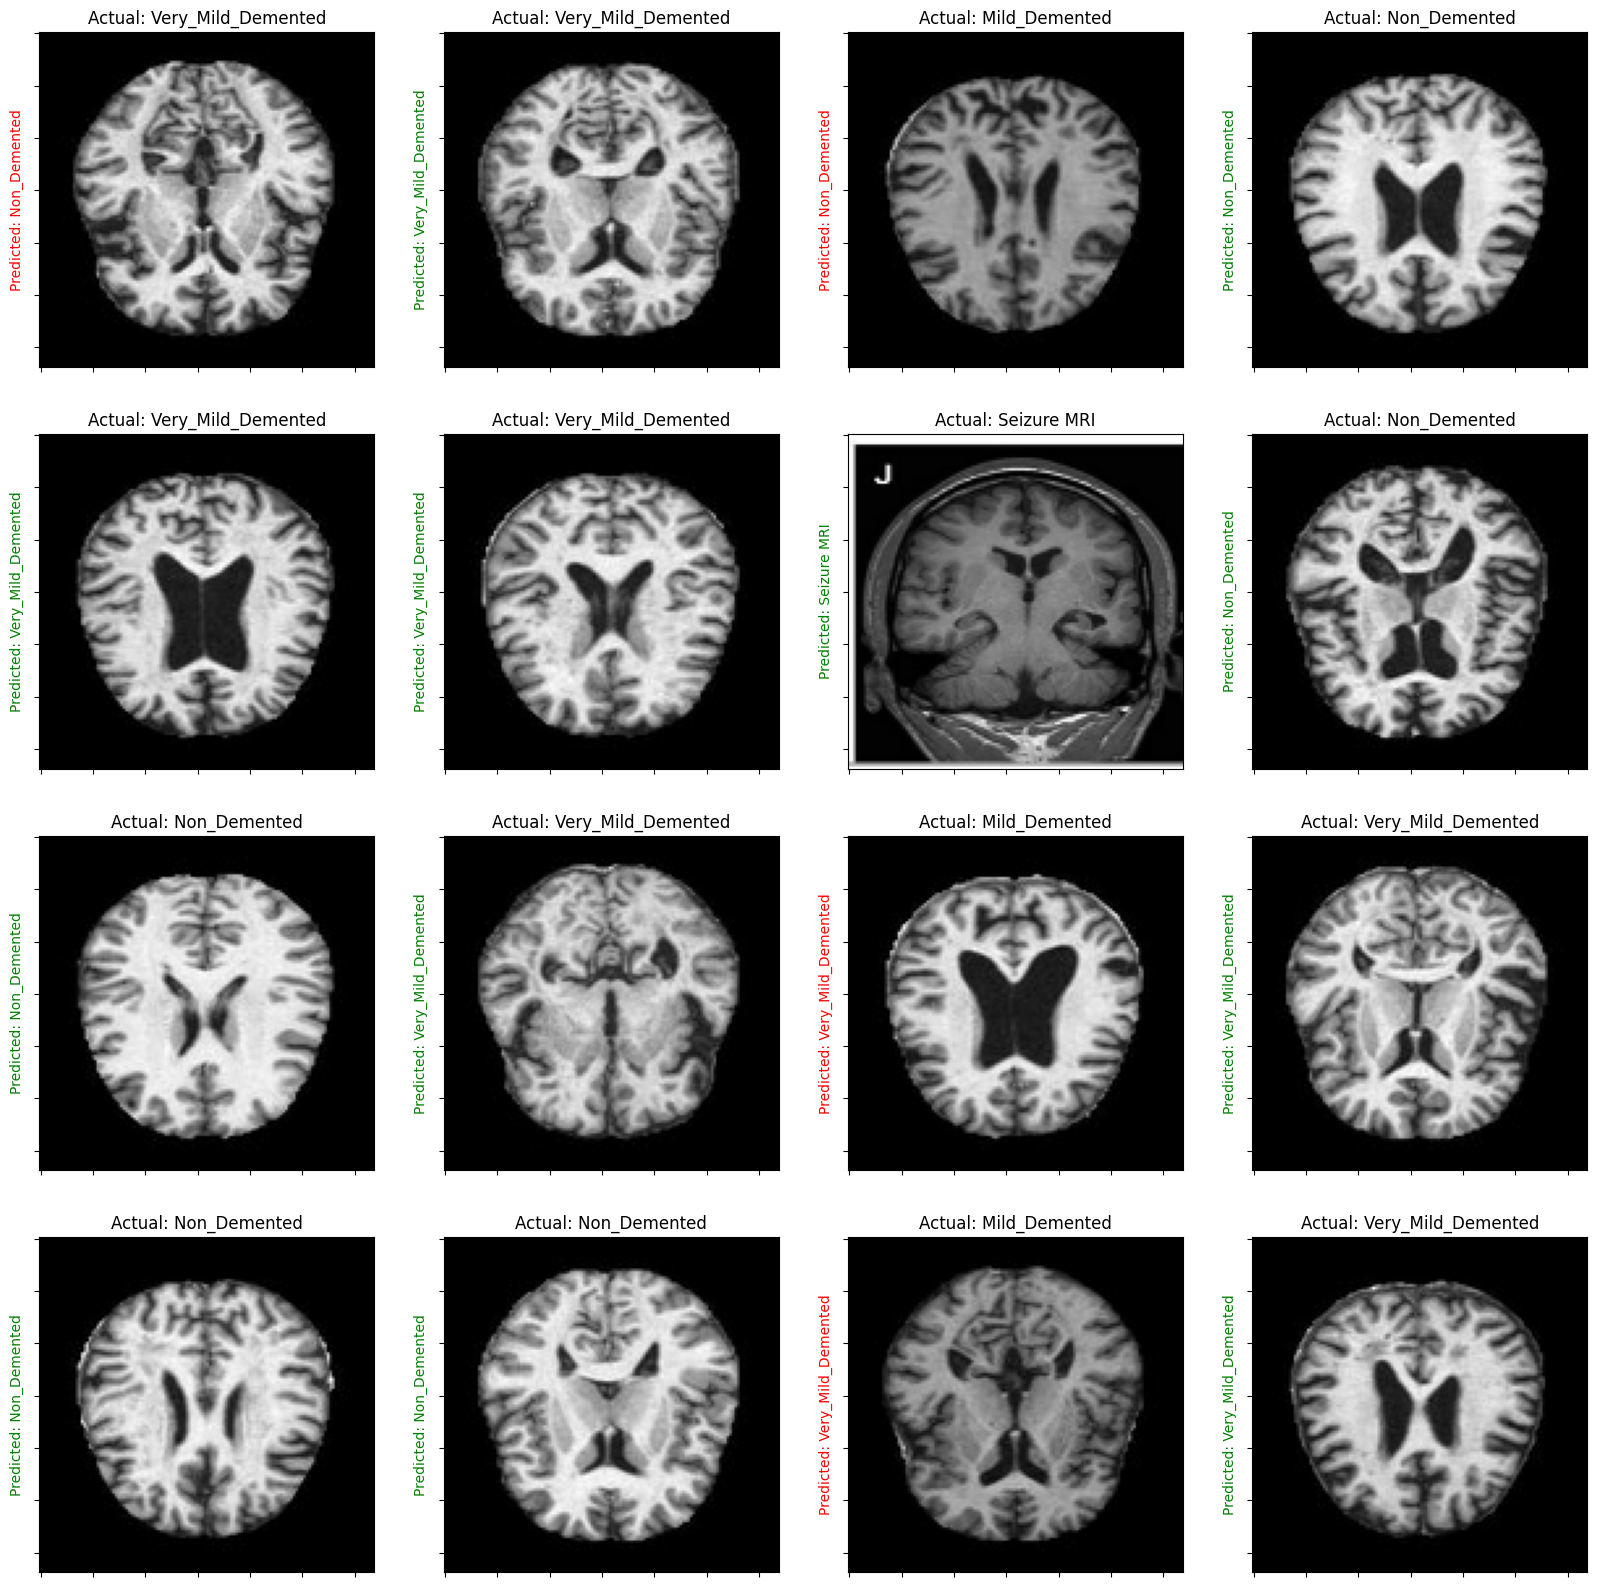

In [ ]:
plt.subplots(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

In [ ]:
for img, label in test_ds.take(1):
    print(label, len(label))
    break

tf.Tensor(
[4 4 4 2 2 2 0 0 4 2 2 2 2 2 2 0 2 4 2 4 2 4 0 2 4 4 4 2 4 4 0 2 2 4 2 4 0
 0 4 0 4 2 2 4 4 2 4 4 2 2 0 4 0 2 2 4 2 0 4 2 4 4 2 2], shape=(64,), dtype=int32) 64


In [ ]:
actual_label = []
pred_label = []
for img, label in test_ds.take(1):
    pred = model.predict(img)
    pred = np.argmax(pred, axis=1)
    print(classification_report(label,pred))

2/2 [==============================] - 0s 60ms/step
              precision    recall  f1-score   support

           0       1.00      0.27      0.43        11
           2       0.88      1.00      0.94        29
           3       1.00      1.00      1.00         1
           4       0.82      1.00      0.90        18
           5       1.00      1.00      1.00         5

    accuracy                           0.88        64
   macro avg       0.94      0.85      0.85        64
weighted avg       0.89      0.88      0.84        64



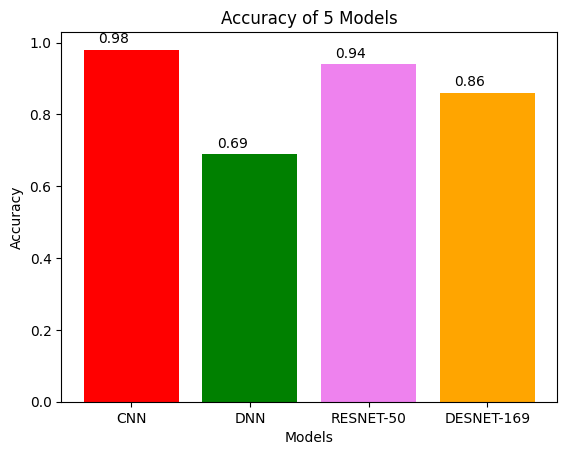

In [ ]:


accuracy_values = [0.98, 0.69, 0.94,0.86]
colors = ['red', 'green' ,'violet','orange']

# Create a bar chart
bar_chart = plt.bar(['CNN','DNN','RESNET-50','DESNET-169'], accuracy_values, color=colors)

# Add accuracy values above the bars
for bar in bar_chart:
    y = bar.get_height()
    plt.text(bar.get_x() + 0.25, y + 0.01, f'{y:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of 5 Models')

# Show the plot
plt.show()
